In [1]:
# This program show how to setup the enveiroment and run same 
# code in simulator and real quantum device 
from qiskit import *

In [2]:
qr = QuantumRegister(2)

In [3]:
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr,cr) 

In [5]:
%matplotlib inline

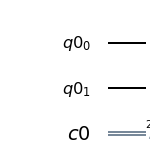

In [6]:
circuit.draw()
circuit.draw(output='mpl')

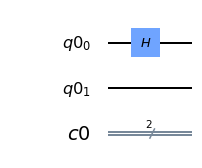

In [7]:
circuit.h(qr[0])
circuit.draw(output='mpl')

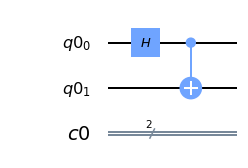

In [8]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

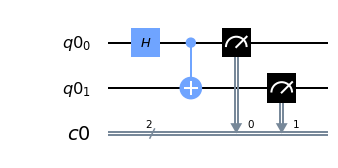

In [9]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [10]:
simulator = Aer.get_backend('qasm_simulator')

In [11]:
result = execute(circuit, backend = simulator).result()

In [12]:
from qiskit.tools.visualization import plot_histogram

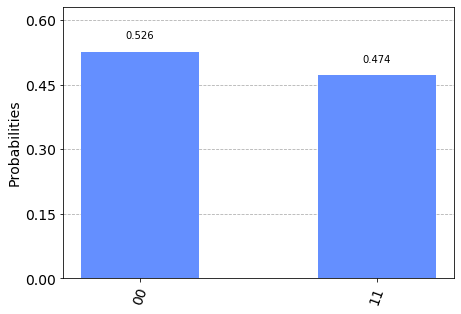

In [13]:
# simulator shows only 2 state 00 and 11 , as consider it as perfect Quantume devices 
plot_histogram(result.get_counts(circuit))

In [14]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
provider = IBMQ.get_provider('ibm-q')

In [16]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [17]:
job = execute(circuit, backend=qcomp)

In [18]:
from qiskit.tools.monitor import job_monitor

In [19]:
job_monitor(job)

Job Status: job has successfully run


In [20]:
result= job.result()

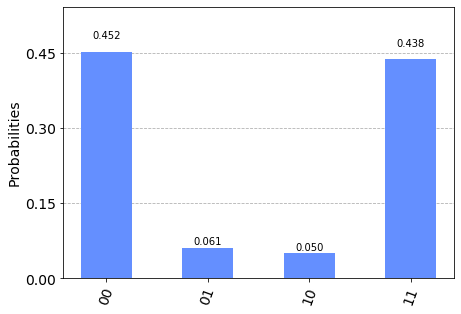

In [21]:
# simulator comes only 2 00 and 11 , In real Quantum device shows the error cases too 
plot_histogram(result.get_counts(circuit))